In [1]:
import pandas as pd

In [2]:
re= pd.read_csv('case_3.csv')

In [3]:
re.head()

,res_id,res_name,price,category,address,zipcode,reviewer_id,review_text,review_score,review_year,review_month,review_day,owner_reply
0,restaurant_4475870329392993618,Flavors Famous Street Food,$$,Fast food restaurant,"3231 Brighton Rd, Pittsburgh, PA 15212",15212.0,reviewer_111052458120489727072,Great food and service,5.0,2022.0,9.0,2.0,NaN
1,restaurant_4475870329392993618,Flavors Famous Street Food,$$,Fast food restaurant,"3231 Brighton Rd, Pittsburgh, PA 15212",15212.0,reviewer_113863745920720706939,want to get sick eat here gyro was nasty nasty...,1.0,2022.0,8.0,26.0,I'm sorry you feel that way sir...
2,restaurant_4475870329392993618,Flavors Famous Street Food,$$,Fast food restaurant,"3231 Brighton Rd, Pittsburgh, PA 15212",15212.0,reviewer_111657865751994410726,If you haven't stopped here to eat yet I highl...,5.0,2022.0,8.0,25.0,NaN
3,restaurant_4475870329392993618,Flavors Famous Street Food,$$,Fast food restaurant,"3231 Brighton Rd, Pittsburgh, PA 15212",15212.0,reviewer_112662232292313111944,Food was awesome!!! Great service!!!,5.0,2022.0,8.0,20.0,NaN
4,restaurant_4475870329392993618,Flavors Famous Street Food,$$,Fast food restaurant,"3231 Brighton Rd, Pittsburgh, PA 15212",15212.0,reviewer_101635934962958819735,My burger was huge pretty good. The wings are ...,3.0,2022.0,8.0,15.0,NaN


In [4]:
re['price'].value_counts()

price
$$      94736
$       79810
$$$     11705
$$$$     7072
Name: count, dtype: int64

In [5]:
re['zipcode'].nunique()

27

In [6]:
re['category'].nunique()
re['category'].value_counts()

category
Restaurant                21028
Pizza restaurant          16321
American restaurant       12063
Italian restaurant        10277
Bar & grill                9763
                          ...  
Hot pot restaurant           22
Box lunch restaurant         11
Corporate office             10
Cantonese restaurant          9
Food products supplier        2
Name: count, Length: 105, dtype: int64

In [7]:
re['reviewer_id'].nunique()
re['reviewer_id'].value_counts()

reviewer_id
reviewer_109585241874690081594    108
reviewer_106829195807637785178    106
reviewer_115067299869739486954     97
reviewer_112604507458002260835     81
reviewer_105607165792363375300     70
                                 ... 
reviewer_109651947618591394177      1
reviewer_107060725140961765507      1
reviewer_107891678736506476872      1
reviewer_118081428655231783742      1
reviewer_114369004061094391274      1
Name: count, Length: 108834, dtype: int64

## *Task 1: Basic Exploration*

1.How many price levels are there? **A:4**

2.How many unique zip codes are represented? **A:27**

3.How many food categories are present? **A:105**

4.How many unique reviewers are in the dataset? **A:108834**

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
#Model 1
re['review_month'] = pd.to_numeric(re['review_month'], errors='coerce')
re['review_score'] = pd.to_numeric(re['review_score'], errors='coerce')
re = re.dropna(subset=['review_month', 'review_score'])

#dummy variable
X = pd.get_dummies(re['review_month'], prefix='month', drop_first=True)


X = sm.add_constant(X)


y = re['review_score']


X = X.astype(float)
y = y.astype(float)

#regression
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.34
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           3.24e-19
Time:                        19:00:41   Log-Likelihood:            -3.3767e+05
No. Observations:              205957   AIC:                         6.754e+05
Df Residuals:                  205945   BIC:                         6.755e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3141      0.010    443.313      0.0

# Model 1
Based on the regression analysis, review_month has a statistically significant impact on review_score (p < 0.05). However, the effect size is small, with the largest coefficient being -0.1020 (for August), indicating only a minor decrease of 0.1 points compared to the baseline month (January). The R-squared value of 0.001 suggests that review_month explains only 0.1% of the variance in review scores, implying limited practical importance. While the timing of reviews has some influence, it is likely not a key driver of review scores.

In [10]:
# Model 2
# Define independent variables (IVs) and dependent variable (DV)
X = re[['review_month', 'review_year']]  # Independent variables
y = re ['review_score']  # Dependent variable

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Run the OLS regression model
model = sm.OLS(y, X).fit()

# Display the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.38e-22
Time:                        19:00:42   Log-Likelihood:            -3.3768e+05
No. Observations:              205957   AIC:                         6.754e+05
Df Residuals:                  205954   BIC:                         6.754e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           31.0908      3.012     10.322   

# Model 2
The R-squared value of 0 indicates that our model is unable to explain any of the variance in the review scores, despite the significant p-values for the independent variables. This suggests that the selected features, review month and review year, are not effective in predicting the review scores.

In [11]:
#Model 3

re['no_reply'] = (re['owner_reply'].isna()).astype(int)

# Model 3 (review_month + review_year + no_reply)
X_model_3 = re[['review_month', 'review_year', 'no_reply']]  
y_model_3 = re['review_score']


X_model_3 = sm.add_constant(X_model_3)

# OLS 
model_3 = sm.OLS(y_model_3, X_model_3).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     239.6
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          3.29e-155
Time:                        19:00:42   Log-Likelihood:            -3.3737e+05
No. Observations:              205957   AIC:                         6.747e+05
Df Residuals:                  205953   BIC:                         6.748e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           17.6472      3.056      5.775   

# Model 3
The regression model explains a very small portion of the variance in review scores (R-squared = 0.003). While the coefficients for review month, review year, and no_reply are statistically significant (p-values < 0.05), the model's overall predictive power is limited.

In [12]:
season_map = {
    3.0: 'spring', 4.0: 'spring', 5.0: 'spring',  
    6.0: 'summer', 7.0: 'summer', 8.0: 'summer', 
    9.0: 'fall', 10.0: 'fall', 11.0: 'fall',      
    12.0: 'winter', 1.0: 'winter', 2.0: 'winter' 
}

re['season'] = re['review_month'].map(season_map)

season_dummies = pd.get_dummies(re['season'], drop_first=True)
season_dummies = season_dummies.astype(int)

# Prepare the model
X_model_4 = pd.concat([re[['review_year', 'no_reply']], season_dummies], axis=1)
X_model_4 = sm.add_constant(X_model_4)
y_model_4 = re['review_score']

# Fit the OLS model
model_4 = sm.OLS(y_model_4, X_model_4).fit()

# Print the model summary
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          2.33e-157
Time:                        19:00:42   Log-Likelihood:            -3.3736e+05
No. Observations:              205957   AIC:                         6.747e+05
Df Residuals:                  205951   BIC:                         6.748e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.9607      3.045      4.913      

# Model 4
The regression model suggests that restaurant response (no_reply) has a significant negative impact on review scores. However, the model's overall explanatory power is low (R-squared = 0.004), indicating that other factors not included in the model may be influencing review scores. The impact of review year and seasonality is mixed and not consistently significant.

## 1. Interpret the results of each model. What patterns do you observe?

Model 1: Review month significantly impacts review scores (p < 0.05). The largest coefficient is -0.1020 (for August), suggesting a slight decrease in scores, but the effect is small. Timing (month) affects review scores, but the influence is minimal.

Model 2: This model explains almost nothing about the variance in review scores (R-squared = 0). Despite significant p-values for review month and review year, these features do not meaningfully predict review scores.

Model 3: This model explains only a small portion of the variance in review scores (R-squared = 0.003). The variables review month, review year, and no_reply are statistically significant, but the model has limited predictive power.

Model 4: The variable no_reply (lack of owner response) has a significant negative impact on review scores. However, the model’s overall explanatory power is very low (R-squared = 0.004), suggesting other factors not included in the model may be influencing review scores. The effect of review year and seasonality is inconsistent and not always significant.

## 2.Compare the models. Which model best explains review scores, and why?
None of the models are particularly strong in explaining the review scores. However, Model 4 appears to have the most comprehensive approach by including seasonality and restaurant response (no_reply), which, despite not explaining much variance (low R-squared), gives more insights into factors that might influence review scores. Therefore, Model 4 might be the best, but the model's explanatory power is still very limited, and other external factors could be at play that are not captured by these models.

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


[nltk_data] Downloading package punkt to /Users/jessica/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessica/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jessica/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())      
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]  # 去除停用词和非字母
    return tokens

# subset1
subset1 = re[re['price'] == '$'].dropna(subset=['review_text'])

subset1['tokens'] = subset1['review_text'].apply(preprocess_text)

subset1 = subset1[subset1['tokens'].apply(len) > 0]

# LDA
def run_lda(subset, num_topics=5):
    dictionary = Dictionary(subset['tokens'])
    corpus = [dictionary.doc2bow(tokens) for tokens in subset['tokens']]
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    return lda_model, dictionary, corpus
lda_model1, dictionary1, corpus1 = run_lda(subset1)


print("Subset 1 Topics ($):")
for idx, topic in lda_model1.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")


Subset 1 Topics ($):
Topic 1: 0.111*"food" + 0.110*"great" + 0.057*"service" + 0.054*"good" + 0.032*"friendly" + 0.029*"place" + 0.029*"staff" + 0.023*"delicious" + 0.022*"always" + 0.020*"nice"
Topic 2: 0.020*"food" + 0.018*"order" + 0.014*"time" + 0.011*"get" + 0.010*"service" + 0.009*"never" + 0.009*"one" + 0.009*"back" + 0.009*"go" + 0.009*"place"
Topic 3: 0.050*"pizza" + 0.050*"best" + 0.026*"pittsburgh" + 0.019*"place" + 0.016*"delicious" + 0.013*"love" + 0.013*"one" + 0.013*"favorite" + 0.011*"ever" + 0.010*"amazing"
Topic 4: 0.078*"good" + 0.041*"food" + 0.024*"really" + 0.014*"pretty" + 0.013*"little" + 0.012*"options" + 0.011*"thai" + 0.011*"price" + 0.011*"place" + 0.010*"menu"
Topic 5: 0.024*"chicken" + 0.023*"like" + 0.012*"fries" + 0.012*"got" + 0.011*"ordered" + 0.010*"meat" + 0.009*"rice" + 0.009*"sandwich" + 0.009*"sauce" + 0.008*"beef"


In [24]:
pip install wordcloud

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


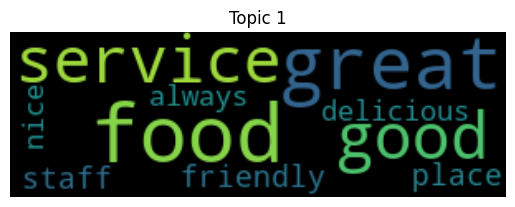

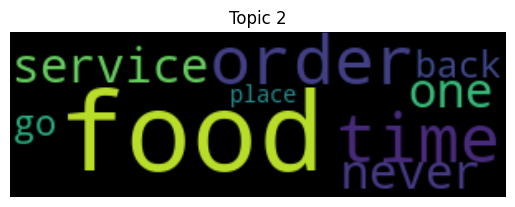

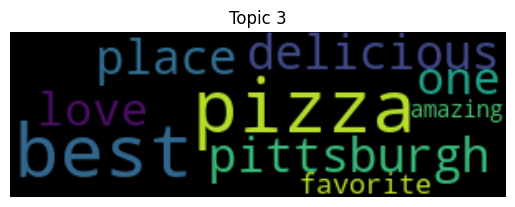

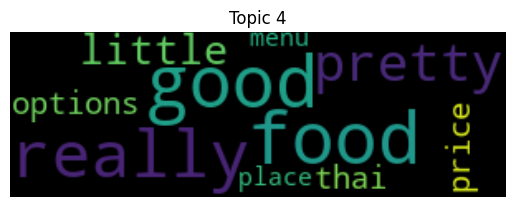

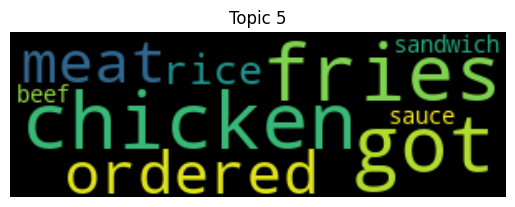

In [31]:
for i in range(5):  # 假设有5个主题
    topic_words = lda_model1.show_topic(i)
    words = ' '.join([word for word, prob in topic_words])

    wordcloud = WordCloud(width=300, height=100).generate(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {i+1}")
    plt.show()

In [32]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())      
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]  # 去除停用词和非字母
    return tokens

# subset2
subset2 = re[re['price'] == '$$$$'].dropna(subset=['review_text'])

subset2['tokens'] = subset2['review_text'].apply(preprocess_text)

subset2 = subset2[subset2['tokens'].apply(len) > 0]

# LDA
def run_lda(subset, num_topics=5):
    dictionary = Dictionary(subset['tokens'])
    corpus = [dictionary.doc2bow(tokens) for tokens in subset['tokens']]
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    return lda_model, dictionary, corpus
lda_model2, dictionary2, corpus2 = run_lda(subset1)


print("Subset 2 Topics ($$$$):")
for idx, topic in lda_model2.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")


Subset 2 Topics ($$$$):
Topic 1: 0.040*"place" + 0.038*"love" + 0.032*"awesome" + 0.023*"nice" + 0.019*"people" + 0.019*"good" + 0.017*"busy" + 0.015*"bar" + 0.014*"great" + 0.012*"tacos"
Topic 2: 0.115*"food" + 0.085*"great" + 0.070*"good" + 0.047*"service" + 0.026*"friendly" + 0.024*"staff" + 0.022*"delicious" + 0.016*"place" + 0.015*"always" + 0.014*"excellent"
Topic 3: 0.055*"best" + 0.044*"pizza" + 0.029*"pittsburgh" + 0.026*"place" + 0.016*"go" + 0.016*"one" + 0.015*"love" + 0.014*"favorite" + 0.013*"ever" + 0.011*"time"
Topic 4: 0.022*"chicken" + 0.019*"good" + 0.013*"like" + 0.011*"sauce" + 0.011*"got" + 0.011*"noodles" + 0.010*"ordered" + 0.010*"cheese" + 0.009*"pizza" + 0.009*"also"
Topic 5: 0.023*"food" + 0.019*"order" + 0.014*"time" + 0.011*"get" + 0.011*"service" + 0.010*"never" + 0.009*"minutes" + 0.009*"back" + 0.009*"even" + 0.008*"one"


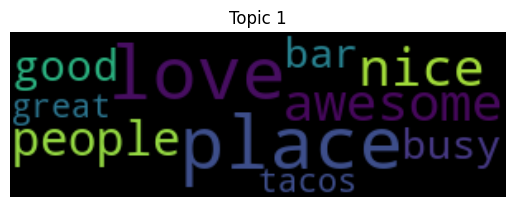

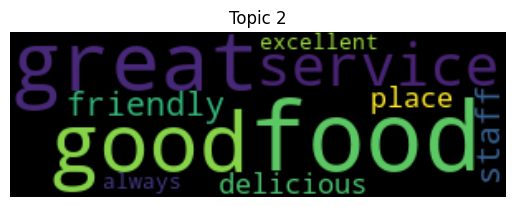

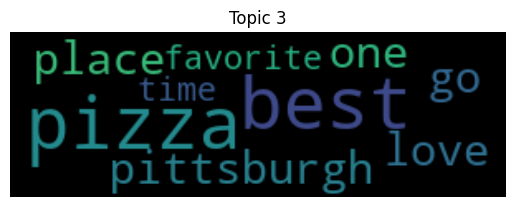

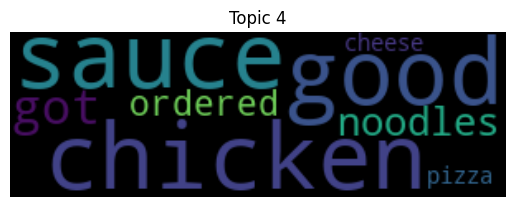

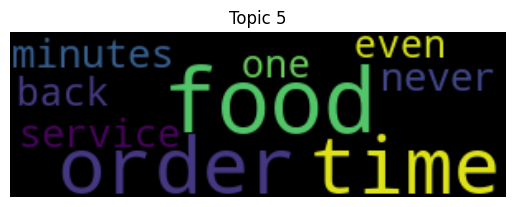

In [33]:
for i in range(5):  
    topic_words = lda_model2.show_topic(i)
    words = ' '.join([word for word, prob in topic_words])

    wordcloud = WordCloud(width=300, height=100).generate(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {i+1}")
    plt.show()

# 1. Comparison and Interpretation of Results
**Lower-Price Establishments (Subset 1)** 
Focuses on friendly service (e.g., "great", "friendly", "staff") and food quality, especially pizza (e.g., "best", "delicious").Customers appreciate value for money, with mentions of affordable food like chicken, fries, and meat.

**Higher-Price Establishments (Subset 2)**
Emphasizes ambiance and overall experience (e.g., "love", "awesome", "bar").
High focus on premium food quality (e.g., "great", "excellent", "delicious") and superior service.
Also mentions gourmet pizza and more varied menu items (e.g., noodles, cheese).

# 2. Differences and Customer Expectations
**Lower-Price:** Customers expect good, affordable food and friendly service with a focus on value.

**Higher-Price:** Customers expect a luxurious dining experience, with premium food, service, and atmosphere.

These differences reflect the distinct expectations of customers: affordability and convenience in lower-end places, and quality and experience in higher-end establishments.